In [ ]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import backend as Kb
import matplotlib.pyplot as plt

print(tf.__version__)
print(K.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1
2.2.4-tf


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ner.csv", encoding = "ISO-8859-1", error_bad_lines=False)
df.head()

b'Skipping line 281837: expected 25 fields, saw 34\n'


,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,pos,prev-iob,prev-lemma,prev-pos,prev-prev-iob,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
0,0,thousand,of,demonstr,NNS,lowercase,demonstrators,IN,lowercase,of,NNS,__START1__,__start1__,__START1__,__START2__,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,1.0,capitalized,Thousands,O
1,1,of,demonstr,have,VBP,lowercase,have,NNS,lowercase,demonstrators,IN,O,thousand,NNS,__START1__,__start1__,__START1__,wildcard,__START1__,capitalized,Thousands,1.0,lowercase,of,O
2,2,demonstr,have,march,VBN,lowercase,marched,VBP,lowercase,have,NNS,O,of,IN,O,thousand,NNS,capitalized,Thousands,lowercase,of,1.0,lowercase,demonstrators,O
3,3,have,march,through,IN,lowercase,through,VBN,lowercase,marched,VBP,O,demonstr,NNS,O,of,IN,lowercase,of,lowercase,demonstrators,1.0,lowercase,have,O
4,4,march,through,london,NNP,capitalized,London,IN,lowercase,through,VBN,O,have,VBP,O,demonstr,NNS,lowercase,demonstrators,lowercase,have,1.0,lowercase,marched,O


In [ ]:
data = df[['sentence_idx','word','tag']]

data.head(2)

,sentence_idx,word,tag
0,1.0,Thousands,O
1,1.0,of,O


In [ ]:
df['tag'].value_counts()

O        889973
B-geo     37525
B-tim     20193
B-org     20184
I-per     17382
B-per     17011
I-org     16537
B-gpe     16392
I-geo      7409
I-tim      6298
B-art       434
B-eve       348
I-eve       297
I-art       280
I-gpe       229
B-nat       226
I-nat        76
Name: tag, dtype: int64

In [ ]:
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["word"].values.tolist(),
                                                        s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_idx").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None
          
getter = SentenceGetter(data)
sentences = getter.sentences

In [ ]:
print(sentences[1:3])

[[('Families', 'O'), ('of', 'O'), ('soldiers', 'O'), ('killed', 'O'), ('in', 'O'), ('the', 'O'), ('conflict', 'O'), ('joined', 'O'), ('the', 'O'), ('protesters', 'O'), ('who', 'O'), ('carried', 'O'), ('banners', 'O'), ('with', 'O'), ('such', 'O'), ('slogans', 'O'), ('as', 'O'), ('"', 'O'), ('Bush', 'B-per'), ('Number', 'O'), ('One', 'O'), ('Terrorist', 'O'), ('"', 'O'), ('and', 'O'), ('"', 'O'), ('Stop', 'O'), ('the', 'O'), ('Bombings', 'O'), ('.', 'O'), ('"', 'O'), ('Families', 'O'), ('of', 'O'), ('soldiers', 'O'), ('killed', 'O'), ('in', 'O'), ('the', 'O'), ('conflict', 'O'), ('joined', 'O'), ('the', 'O'), ('protesters', 'O'), ('who', 'O'), ('carried', 'O'), ('banners', 'O'), ('with', 'O'), ('such', 'O'), ('slogans', 'O'), ('as', 'O'), ('"', 'O'), ('Bush', 'B-per'), ('Number', 'O'), ('One', 'O'), ('Terrorist', 'O'), ('"', 'O'), ('and', 'O'), ('"', 'O'), ('Stop', 'O'), ('the', 'O'), ('Bombings', 'O'), ('.', 'O'), ('"', 'O')], [('They', 'O'), ('marched', 'O'), ('from', 'O'), ('the', 'O

In [ ]:
from math import nan

words = list(set(data["word"].values))
n_words = len(words)

tags = []
for tag in set(data["tag"].values):
    if tag is nan or isinstance(tag, float):
        tags.append('unk')
    else:
        tags.append(tag)
n_tags = len(tags)

In [ ]:
from future.utils import iteritems

word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {v: k for k, v in iteritems(tag2idx)}

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

maxlen = max([len(s) for s in sentences])

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=maxlen, sequences=X, padding="post",value=n_words - 1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=maxlen, sequences=y, padding="post", value=tag2idx["O"])
y = [to_categorical(i, num_classes=n_tags) for i in y]

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Using TensorFlow backend.


In [ ]:
len(X)

35177

In [ ]:
len(X_train)

28141

In [ ]:
len(X_test)

7036

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-hwaja291
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-hwaja291
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp37-none-any.whl size=101065 sha256=ea7ea9665a9e6f3f4d5420ae4c49268f29a901f6f5af8e00250f32cd3d6deb9f
  Stored in directory: /tmp/pip-ephem-wheel-cache-c52vn610/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
import keras as k
from keras_contrib.layers import CRF

input = Input(shape=(140,))
word_embedding_size = 150

# Embedding Layer
model = Embedding(input_dim=n_words, output_dim=word_embedding_size, input_length=140)(input)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=word_embedding_size, 
                           return_sequences=True, 
                           dropout=0.5, 
                           recurrent_dropout=0.5, 
                           kernel_initializer=k.initializers.he_normal()))(model)
# TimeDistributed Layer
model = TimeDistributed(Dense(n_tags, activation="relu"))(model)  

# CRF Layer
crf = CRF(n_tags)

out = crf(model)  # output
model = Model(input, out)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

#Optimiser 
adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])

model.summary()



/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 140)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 140, 150)          4525950   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 140, 300)          361200    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 140, 18)           5418      
_________________________________________________________________
crf_1 (CRF)                  (None, 140, 18)           702       
Total params: 4,893,270
Trainable params: 4,893,270
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Saving the best model only
filepath="ner-bi-lstm-td-model-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [ ]:
# Fit the best model
history = model.fit(X_train, np.array(y_train), batch_size=256, epochs=20, validation_split=0.1, verbose=1, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 25326 samples, validate on 2815 samples
Epoch 1/20
25326/25326 [==============================] - 414s 16ms/step - loss: 0.5380 - crf_viterbi_accuracy: 0.9662 - acc: 8.5457e-05 - val_loss: 0.2015 - val_crf_viterbi_accuracy: 0.9668 - val_acc: 0.9668

Epoch 00001: val_acc improved from -inf to 0.96675, saving model to ner-bi-lstm-td-model-0.97.hdf5
Epoch 2/20
25326/25326 [==============================] - 411s 16ms/step - loss: 0.1810 - crf_viterbi_accuracy: 0.9673 - acc: 8.5457e-05 - val_loss: 0.1610 - val_crf_viterbi_accuracy: 0.9668 - val_acc: 0.9668

Epoch 00002: val_acc did not improve from 0.96675
Epoch 3/20
25326/25326 [==============================] - 412s 16ms/step - loss: 0.1266 - crf_viterbi_accuracy: 0.9685 - acc: 8.5457e-05 - val_loss: 0.0988 - val_crf_viterbi_accuracy: 0.9715 - val_acc: 0.9715

Epoch 00003: val_acc improved from 0.96675 to 0.97152, saving model to ner-bi-lstm-td-model-0.97.hdf5
Epoch 4/20
25326/25326

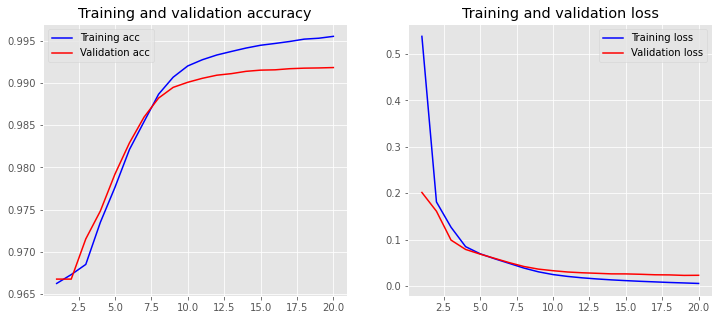

In [ ]:
# Plot the graph 
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['crf_viterbi_accuracy']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
test_pred = model.predict(X_test, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

7036/7036 [==============================] - 43s 6ms/step


In [ ]:
! pip install seqeval

     |████████████████████████████████| 51kB 4.4MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16172 sha256=7d02962bdf50a6ab84d2980fa8862a504a8f387be73bed8bebb47569ed80dcc7
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval


In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 78.7%


In [ ]:
! pip install sklearn_crfsuite

     |████████████████████████████████| 747kB 7.5MB/s 


In [ ]:
from  sklearn_crfsuite.metrics import flat_classification_report  
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        92
       B-eve       0.64      0.21      0.31        67
       B-geo       0.83      0.87      0.85      7167
       B-gpe       0.94      0.92      0.93      3202
       B-nat       0.00      0.00      0.00        59
       B-org       0.79      0.67      0.72      4129
       B-per       0.83      0.76      0.79      3490
       B-tim       0.91      0.86      0.88      3982
       I-art       0.00      0.00      0.00        61
       I-eve       0.00      0.00      0.00        52
       I-geo       0.77      0.76      0.77      1362
       I-gpe       0.00      0.00      0.00        52
       I-nat       0.00      0.00      0.00        11
       I-org       0.79      0.70      0.74      3252
       I-per       0.85      0.77      0.81      3539
       I-tim       0.82      0.68      0.74      1210
           O       1.00      1.00      1.00    953313

    accuracy              

In [ ]:
test_pred_one = model.predict(X_test, verbose=1)   
pred_labels_one = pred2label(test_pred_one)
test_labels_one = pred2label(y_test)

7036/7036 [==============================] - 43s 6ms/step


In [ ]:
len(pred_labels_one)

7036

In [ ]:
test_labels_one

In [ ]:
len(X_test)

7036

In [ ]:
len(test_labels)

7036

In [ ]:
len(pred_labels)

7036

In [ ]:
labels=['O',
 'B-art',
 'I-art',
 'B-eve',
 'I-eve',
 'B-geo',
 'I-geo',
 'B-gpe',
 'I-gpe',
 'B-nat',
 'I-nat',
 'B-org',
 'I-org',
 'B-per',
 'I-per',
 'B-tim',
 'I-tim']

In [ ]:
from  sklearn_crfsuite.metrics import flat_classification_report  
report = flat_classification_report(test_labels_one,pred_labels_one)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        92
       B-eve       0.64      0.21      0.31        67
       B-geo       0.83      0.87      0.85      7167
       B-gpe       0.94      0.92      0.93      3202
       B-nat       0.00      0.00      0.00        59
       B-org       0.79      0.67      0.72      4129
       B-per       0.83      0.76      0.79      3490
       B-tim       0.91      0.86      0.88      3982
       I-art       0.00      0.00      0.00        61
       I-eve       0.00      0.00      0.00        52
       I-geo       0.77      0.76      0.77      1362
       I-gpe       0.00      0.00      0.00        52
       I-nat       0.00      0.00      0.00        11
       I-org       0.79      0.70      0.74      3252
       I-per       0.85      0.77      0.81      3539
       I-tim       0.82      0.68      0.74      1210
           O       1.00      1.00      1.00    953313

    accuracy              

In [ ]:
TP = {}
TN = {}
FP = {}
FN = {}
for tag in tag2idx.keys():
    TP[tag] = 0
    TN[tag] = 0    
    FP[tag] = 0    
    FN[tag] = 0    

def accumulate_score_by_tag(gt, pred):
    """
    For each tag keep stats
    """
    if gt == pred:
        TP[gt] += 1
    elif gt != 'O' and pred == 'O':
        FN[gt] +=1
    elif gt == 'O' and pred != 'O':
        FP[gt] += 1
    else:
        TN[gt] += 1

In [ ]:
for i, sentence in enumerate(X_test):
    y_hat = np.argmax(test_pred[0], axis=-1)
    gt = np.argmax(y_test[0], axis=-1)
    for idx, (w,pred) in enumerate(zip(sentence,y_hat)):
        accumulate_score_by_tag(idx2tag[gt[idx]],tags[pred])

In [ ]:
for tag in tag2idx.keys():
    print(f'tag:{tag}')    
    print('\t TN:{:10}\tFP:{:10}'.format(TN[tag],FP[tag]))
    print('\t FN:{:10}\tTP:{:10}'.format(FN[tag],TP[tag]))  

tag:unk
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-art
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-geo
	 TN:         0	FP:         0
	 FN:         0	TP:      7036
tag:I-org
	 TN:         0	FP:         0
	 FN:         0	TP:     21108
tag:I-per
	 TN:         0	FP:         0
	 FN:         0	TP:      7036
tag:B-nat
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:O
	 TN:         0	FP:         0
	 FN:         0	TP:    935788
tag:I-geo
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-gpe
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:I-gpe
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:I-tim
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:I-eve
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-eve
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:I-nat
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-per
	 TN:         0	

In [ ]:
test_sentence = ["Hawking", "was", "a", "Fellow", "of", "the", "Royal", "Society", ",", "a", "lifetime", "member",
                 "of", "the", "Pontifical", "Academy", "of", "Sciences", ",", "and", "a", "recipient", "of",
                 "the", "Presidential", "Medal", "of", "Freedom", ",", "the", "highest", "civilian", "award",
                 "in", "the", "United", "States", "."]

Need to look into this

In [ ]:
x_test_sent = pad_sequences(sequences=[[word2idx.get(w, 0) for w in test_sentence]],
                            padding="post", value=0, maxlen=maxlen)

In [ ]:
tags

['B-art',
 'unk',
 'O',
 'I-eve',
 'I-geo',
 'I-org',
 'B-tim',
 'I-nat',
 'I-gpe',
 'B-nat',
 'B-geo',
 'I-art',
 'B-eve',
 'B-gpe',
 'B-org',
 'I-tim',
 'B-per',
 'I-per']

In [ ]:
i = np.random.randint(0,X_test.shape[0])
x_test_sent=pad_sequences(sequences=[[word2idx.get(w, 0) for w in sentences[i]]],
                            padding="post", value=0, maxlen=maxlen)

In [ ]:

p = model.predict(np.array([x_test_sent[0]]))

In [ ]:
p = np.argmax(p, axis=-1)
true = np.argmax(y_test[0], -1)

In [ ]:
true

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 10,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2, 10,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2])

In [ ]:

print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(50 * "=")
for w, pred in zip(test_sentence, p[0]):
    print("{:15}: {:5}".format(w, tags[pred]))


print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_te[i], true, p[0]):
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-2], idx2tag[t], idx2tag[pred]))

In [ ]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.6MB 66kB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 3.2MB 54.4MB/s 
     |████████████████████████████████| 368kB 51.3MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 7.5MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
